# Фреймворк PyTorch для разработки искусственных нейронных сетей

## Урок 5. Сегментация изображений

In [ ]:
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py

--2022-04-13 20:50:13--  https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘ya.py’

ya.py               100%[===================>]     723  --.-KB/s    in 0s      

2022-04-13 20:50:13 (25.4 MB/s) - ‘ya.py’ saved [723/723]



In [ ]:
!chmod +x ya.py

In [ ]:
!python ya.py https://disk.yandex.ru/d/JRaU80rPXASR0Q ./sample_data/data

--2022-04-13 20:50:59--  https://downloader.disk.yandex.ru/disk/3262684664b936a59cc9e8aac928fe0e45bc81cd4b1a190a527e726a45d0dafa/62576ff3/2VRbCCH7Jb5LgoNFlRhBtwfj5evuU41zVGFQa7OoGNoSBCvbPCEa86XOjuV9JSyalSowsTHSPVlhQ-tgoArTnw%3D%3D?uid=0&filename=favorita-grocery-sales-forecasting.zip&disposition=attachment&hash=8RhKZLCIcitbNwq6w05Etfr6bLZKQYqq%2Bnqzpy0y1jLV0eOtQPdpJ5fGxzCnDeLsq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=42105875&fsize=480014675&hid=a2b93773f6905bd65a420eb205e80d62&media_type=compressed&tknv=v2
Resolving downloader.disk.yandex.ru (downloader.disk.yandex.ru)... 77.88.21.127, 2a02:6b8::2:127
Connecting to downloader.disk.yandex.ru (downloader.disk.yandex.ru)|77.88.21.127|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s778sas.storage.yandex.net/rdisk/3262684664b936a59cc9e8aac928fe0e45bc81cd4b1a190a527e726a45d0dafa/62576ff3/2VRbCCH7Jb5LgoNFlRhBtwfj5evuU41zVGFQa7OoGNoSBCvbPCEa86XOjuV9JSyalSowsTHSPVlh

In [ ]:
!unzip /content/favorita-grocery-sales-forecasting.zip

Archive:  /content/favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     


In [ ]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras import callbacks
from keras.callbacks import ModelCheckpoint

In [ ]:
!7z e /content/train.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 474092593 bytes (453 MiB)

Extracting archive: /content/train.csv.7z
--
Path = /content/train.csv.7z
Type = 7z
Physical Size = 474092593
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train.csv                  1% - train.csv                  2% - train.csv                  3% - train.csv                  4% - train.csv                  5% - train.csv                  6% - train.csv                  7% - train.csv

In [ ]:
!7z e /content/test.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 4885065 bytes (4771 KiB)

Extracting archive: /content/test.csv.7z
--
Path = /content/test.csv.7z
Type = 7z
Physical Size = 4885065
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%     23% - test.csv                46% - test.csv                73% - test.csv                96% - test.csv               Everything is Ok

Size:       126163026
Compressed: 4885065


In [ ]:
!7z e /content/sample_submission.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 666528 bytes (651 KiB)

Extracting archive: /content/sample_submission.csv.7z
--
Path = /content/sample_submission.csv.7z
Type = 7z
Physical Size = 666528
Headers Size = 146
Method = LZMA2:24
Solid = -
Blocks = 1

  0%     72% - sample_submission.csv                            Everything is Ok

Size:       40445582
Compressed: 666528


In [ ]:
!python -m pip install dask[dataframe]
!pip install lightautoml

     |████████████████████████████████| 136 kB 37.8 MB/s 
     |████████████████████████████████| 294 kB 23.0 MB/s 
     |████████████████████████████████| 425 kB 60.6 MB/s 
     |████████████████████████████████| 804.1 MB 2.2 kB/s 
     |████████████████████████████████| 212 kB 79.0 MB/s 
     |████████████████████████████████| 1.2 MB 52.6 MB/s 
     |████████████████████████████████| 308 kB 52.1 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 2.8 MB 43.7 MB/s 
     |████████████████████████████████| 81 kB 10.6 MB/s 
     |████████████████████████████████| 210 kB 80.6 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 150 kB 86.2 MB/s 
     |████████████████████████████████| 113 kB 57.2 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 23.2 MB 12.6 MB/s 
     |███████████

### Обучить GRU, LSTM для предсказания временного ряда на примере https://www.kaggle.com/c/favorita-grocery-sales-forecasting (для каждого типа продуктов)

In [ ]:
from datetime import date
from dask import dataframe as ddf
from dask import array as da

In [ ]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
test = pd.read_csv('/content/test.csv')
dask_train = ddf.read_csv('/content/train.csv')

In [ ]:
dask_train["date"] =  ddf.to_datetime(dask_train["date"])
train_2016 = dask_train[dask_train["date"].dt.year == 2016]
train_2016 = train_2016.compute()
date_list=np.unique(train_2016["date"])

/usr/local/lib/python3.7/dist-packages/dask/utils.py:30: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*args, **kwargs)


In [ ]:
train_2016.drop("id",axis=1,inplace=True)
train_2016.drop("onpromotion",axis=1,inplace=True)
train_2016.fillna(0, inplace=True)

In [ ]:
train_2016['store_nbr'] = train_2016['store_nbr'].astype(np.int8)
train_2016['item_nbr'] = train_2016['item_nbr'].astype(np.int32)
train_2016['unit_sales'] = train_2016['unit_sales'].astype(np.int8)

In [ ]:
train_2016_25= train_2016[train_2016["store_nbr"] == 25]
train_2016_25_105574= train_2016_25[train_2016_25["item_nbr"] == 105574]
train_2016_25_105574.drop("store_nbr",axis=1,inplace=True)
train_2016_25_105574.drop("item_nbr",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_date=pd.DataFrame(date_list)
df_date = df_date.rename(columns={0: 'date'})

In [ ]:
df = pd.merge(df_date, train_2016_25_105574, how='left', on=['date'])
df.fillna(0,inplace=True)

### LSTM

In [ ]:
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [ ]:
train, test =df[df["date"].dt.month <= 11], df[df["date"].dt.month > 11]
train=train.set_index("date")
test=test.set_index("date")
df=df.set_index("date")
train=train.values
test=test.values
df=df.values

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, validation_data=(testX, testY),epochs=25, batch_size=1, verbose=2)

Epoch 1/25
330/330 - 5s - loss: 37.6234 - val_loss: 24.9188 - 5s/epoch - 14ms/step
Epoch 2/25
330/330 - 1s - loss: 19.7668 - val_loss: 20.2778 - 843ms/epoch - 3ms/step
Epoch 3/25
330/330 - 1s - loss: 18.3404 - val_loss: 19.8667 - 810ms/epoch - 2ms/step
Epoch 4/25
330/330 - 1s - loss: 17.3896 - val_loss: 19.9517 - 786ms/epoch - 2ms/step
Epoch 5/25
330/330 - 1s - loss: 17.8630 - val_loss: 19.1186 - 767ms/epoch - 2ms/step
Epoch 6/25
330/330 - 1s - loss: 17.8325 - val_loss: 19.2675 - 903ms/epoch - 3ms/step
Epoch 7/25
330/330 - 1s - loss: 17.1141 - val_loss: 19.1110 - 862ms/epoch - 3ms/step
Epoch 8/25
330/330 - 1s - loss: 18.3533 - val_loss: 19.1334 - 730ms/epoch - 2ms/step
Epoch 9/25
330/330 - 1s - loss: 17.1441 - val_loss: 19.1117 - 794ms/epoch - 2ms/step
Epoch 10/25
330/330 - 1s - loss: 17.2717 - val_loss: 19.1246 - 798ms/epoch - 2ms/step
Epoch 11/25
330/330 - 1s - loss: 16.4051 - val_loss: 19.1493 - 883ms/epoch - 3ms/step
Epoch 12/25
330/330 - 1s - loss: 16.4187 - val_loss: 19.0761 - 94

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

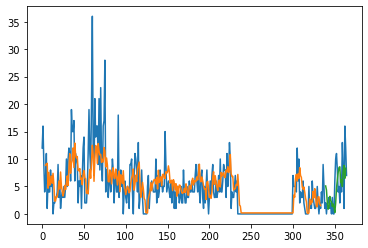

In [ ]:

trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict

plt.plot(df)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### GRU

In [ ]:
!7z e /content/stores.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 648 bytes (1 KiB)

Extracting archive: /content/stores.csv.7z
--
Path = /content/stores.csv.7z
Type = 7z
Physical Size = 648
Headers Size = 130
Method = LZMA2:12
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       1387
Compressed: 648


In [ ]:
!7z e /content/items.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 14315 bytes (14 KiB)

Extracting archive: /content/items.csv.7z
--
Path = /content/items.csv.7z
Type = 7z
Physical Size = 14315
Headers Size = 122
Method = LZMA2:17
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       101841
Compressed: 14315


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.autograd import Variable
import time, math
import random

In [ ]:
from dask.utils import derived_from
one_year = pd.date_range(pd.to_datetime('2016-08-15'),pd.to_datetime('2017-08-15'))
cols = ['date','unit_sales','onpromotion']
df_to_copy = pd.DataFrame(index=one_year)
df_to_copy['day'] = df_to_copy.index.day
df_to_copy['month'] = df_to_copy.index.month

class GroceryDataset(Dataset):
    
    def groups_to_series(self, x):
        global df_to_copy
        df = df_to_copy.copy()
        df = df.merge(x[cols], right_on='date', left_index=True, how='left')
        df = df.fillna(0)
        df = df.as_matrix()
        return df
    def __init__(self):
        
        
        self.train = ddf.read_csv('/content/train.csv')
        self.train.date = ddf.to_datetime(self.train.date)
        self.train = self.train[self.train.date>pd.to_datetime('2016-08-14')]
        self.train = self.train.drop('id',axis=1)
        self.train = self.train.compute()
        self.train.onpromotion = self.train.onpromotion.astype(int)
        self.train.unit_sales = self.train.unit_sales.apply(abs)
        
        self.group = list(self.train.groupby(['item_nbr','store_nbr']).groups.keys())
        

        
        self.item_dataset = pd.read_csv('/content/items.csv').set_index('item_nbr')
        self.store_dataset = pd.read_csv('/content/stores.csv').set_index('store_nbr')
        self.len = len(self.group)
        
        self.item_set = list(set(self.train['item_nbr']))
        self.store_set = list(set(self.train['store_nbr']))
        self.fam_set = list(set(self.item_dataset['family']))
        self.cluster_set = list(set(self.store_dataset['cluster']))
        
        self.item_set_len = len(self.item_set)
        self.store_set_len = len(self.store_set)
        self.fam_set_len = len(self.fam_set)
        self.cluster_set_len = len(self.cluster_set)

        self.item_to_ix = {var: i for i, var in enumerate(self.item_set)}
        self.store_to_ix = {var: i for i, var in enumerate(self.store_set)}
        self.fam_to_ix = {var: i for i, var in enumerate(self.fam_set)}
        self.cluster_to_ix = {var: i for i, var in enumerate(self.cluster_set)}
    
        
    def __getitem__(self, ind):
                
        item, store = self.group[ind]
        
        data = self.train[(self.train.store_nbr==store)&(self.train.item_nbr==item)].groupby(['store_nbr','item_nbr']).apply(self.groups_to_series)

        
        fam = self.item_dataset.loc[item].family
        cluster = self.store_dataset.loc[store].cluster
        
        item_tensor = torch.LongTensor([[self.item_to_ix[item]]])
        
        store_tensor = torch.LongTensor([[self.store_to_ix[store]]])
        
        fam_tensor = torch.LongTensor([[self.fam_to_ix[fam]]])
        
        cluster_tensor = torch.LongTensor([[self.cluster_to_ix[cluster]]])
                                
        unit_sales = torch.from_numpy(np.array([x[3:] for x in data.iloc[0][:-1]]).astype(float)).type(torch.FloatTensor)
        
        day = torch.from_numpy(np.array([x[0] for x in data.iloc[0][:-1]])).type(torch.LongTensor)
        
        month = torch.from_numpy(np.array([x[1] for x in data.iloc[0][:-1]])).type(torch.LongTensor)
        
        y = torch.from_numpy(np.array([x[3] for x in data.iloc[0][1:]])).type(torch.FloatTensor)
        
        return item_tensor, store_tensor,fam_tensor, cluster_tensor, unit_sales, day, month, y
    def __len__(self):
        return self.len

In [ ]:
dataset = GroceryDataset()
train_loader = DataLoader(dataset= dataset, batch_size=32, shuffle=False, num_workers=0)

/usr/local/lib/python3.7/dist-packages/dask/utils.py:30: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*args, **kwargs)


In [ ]:
class RNN(nn.Module):
    def __init__(self, bs,input_size, item_set_size ,store_set_size,fam_set_size,
                 cluster_set_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.batch_size = bs
        
        self.item_encoder = nn.Embedding(item_set_size, 40)
        self.store_encoder = nn.Embedding(store_set_size, 5)
        self.fam_encoder = nn.Embedding(fam_set_size, 5)
        self.cluster_encoder = nn.Embedding(cluster_set_size, 5)  
        self.day_encoder = nn.Embedding(32, 10)
        self.month_encoder = nn.Embedding(13, 3)
        
        self.gru = nn.GRU(input_size+40+5+5+5+10+3, hidden_size, n_layers, batch_first=True, dropout=0.2)
        self.regressor = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, item_tensor, store_tensor,fam_tensor, cluster_tensor, day, month, hidden):

        embedding = torch.cat((self.item_encoder(item_tensor.squeeze()), 
                                self.day_encoder(day),
                                self.month_encoder(month),
                                self.store_encoder(store_tensor.squeeze()), self.fam_encoder(fam_tensor.squeeze()),
                                self.cluster_encoder(cluster_tensor.squeeze())),1)
        
        
        input = torch.cat((input, embedding),1).unsqueeze(1)

        output, hidden = self.gru(input,hidden)
        output = self.regressor(output)
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers,self.batch_size,self.hidden_size))

In [ ]:
n_epochs = 100
hidden_size = 64
output_size = 1
n_layers = 2
lr = 0.005
batch_size=32

decoder = RNN(batch_size,2, dataset.item_set_len, dataset.store_set_len, dataset.fam_set_len,dataset.cluster_set_len, hidden_size , output_size, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.MSELoss()

In [ ]:
loss_avg = 0


def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()
for i, data in enumerate(train_loader, 0):
    
    item_tensor, store_tensor,fam_tensor, cluster_tensor, unit_sales, day, month, y = data
    item = Variable(item_tensor, requires_grad=False)
    store = Variable(store_tensor,requires_grad=False)
    fam = Variable(fam_tensor,requires_grad=False)
    cluster = Variable(cluster_tensor,requires_grad=False) 
    d = Variable(day,requires_grad=False) #day of week
    m = Variable(month,requires_grad=False) # month of year
    row = Variable(unit_sales,requires_grad=False) #sales for that day, and if on promo
    
    y = Variable(y,requires_grad=False)
    
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    
    outputs = Variable(torch.zeros((len(row[0]), row.size()[0]))) #series to collect ouputs
    loss = 0
    force = random.random() < 0.5
    
    #teacher-forcing or not
    if force:
        for c in range(len(row[0])):
            outputs[c], hidden = decoder(row[:,c],item, store,fam , cluster, d[:,c],m[:,c] , hidden)
    else:
         for c in range(len(row[0])):
            if c>0:
                outputs[c], hidden = decoder(torch.cat((outputs[c-1].unsqueeze(1),row[:,c,1].unsqueeze(1)),1),item, store,fam , cluster, d[:,c],m[:,c] , hidden)   
            else:
                outputs[c], hidden = decoder(row[:,c],item, store,fam , cluster, d[:,c],m[:,c] , hidden)

    loss += criterion(outputs[15:].view(32,-1),y[:,15:]) #hard coded batch-size... only eval after 15 time steps
    loss.backward()
    decoder_optimizer.step()
    

    if i % 2 == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), i, i / 10, loss.data[0]/y.size()[1]))

AttributeError: ignored